# **Entertainment Software Rating Board 2016 Analysis**

## Table of Content
- [Introduction](#introduction)
- [Data and Library Import](#1-data--library-import)
    - [Import Library](#11-import-library)
    - [Import Data](#12-import-data)
- [Data Preparation](#2-data-preparation)
    - [Modify Data Type](#22-modify-data-type)
    - [Handle Missing Value](#23-handle-missing-value)
    - [Data Transformation & Manipulation](#24-data-transformation--manipulation)
- [Data Analysis Exploration](#3-data-analysis-exploration)
    - [Total Games Released on Different Year](#31-total-games-released-on-different-year)
    - [Top 3 Platforms with Biggest Sales](#32-top-3-platform-with-biggest-sales)
        - [Top 3 Platform Sales Distribution](#321-top-3-platform-sales-distribution)
        - [Obselete Platform](#322-obselete-platform)
    - [Lifespan of Unpopular and Popular Platform](#33-lifespan-of-unpopular-and-popular-platform)
        - [List of The Platform became Unpopular with The Year](#331-list-of-the-platform-became-unpopular-with-the-year)
        - [All Platform Lifespan](#332-all-platform-lifespan)
    - [Top 10 Platform with Biggest Sales](#34-top-10-platform-with-biggest-sales)
    - [Global Sales of All Games Categorized by Platform](#35-global-sales-of-all-games-categorized-by-platform)
    - [Correlation between 'user_score' and 'critic_score' Affect the Top Platform](#36-correlation-between-user_score-and-critic_score-affect-the-top-platform)
    - [Top 5 Sales of Games with Many Platform Distribution](#37-top-5-sales-of-games-with-many-platform-distribution)
    - [Distribution of Top Sales based on Games Genre](#38-distribution-of-top-sales-based-on-games-genre)
    - [User Profile Based on Area](#39-user-profile-based-on-area)
        - [Area Sales Distribution for Top 1 Platform](#391-area-sales-distribution-for-top-1-platform)
        - [Top 5 Platform in NA, EU, and JP](#392-top-5-platform-in-na-eu-and-jp)
        - [Top 5 Genre in NA, EU, and JP](#393-top-5-genre-in-na-eu-and-jp)
        - [ESRB Rating influence The Sales in Each Area](#394-esrb-rating-influence-the-sales-in-each-area)
- [Hypothesis Testing](#4-hypothesis-testing)
    - [Average User Rating between Xbox One and PC as The Platform](#41-average-user-rating-between-xbox-one-and-pc-as-the-platform)
    - [Average User Rating between Action and Sports as The Genre](#42-average-user-rating-between-action-and-sports-as-the-genre)
- [Overall Summary](#5-overall-summary)

## Introduction

In preparation for the 2017 marketing campaign, the online store "Ice" is exploring video game data from 2016. The dataset contains user and expert reviews, genre information, platform specifics, and historical sales data. An interesting component of this dataset is the ESRB abbreviation, providing age ratings for games.

With the aim of identifying sales trends and success determinants in games, our focus revolves around analyzing the existing data. We aim to understand user preferences, predict market trends, and unearth promising games to guide our upcoming advertising campaign. Let's dive into game data to enhance the shopping experience for "Ice" customers!

## 1. Data & Library Import

### 1.1. Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

### 1.2. Import Data

In [2]:
data = pd.read_csv('games.csv')

## 2. Data Preparation

In [3]:
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4071,Football Manager Handheld 2009,PSP,2008.0,Sports,0.00,0.47,0.00,0.02,NaN,NaN,NaN
11406,Robotron X,PS,1996.0,Shooter,0.05,0.03,0.00,0.01,NaN,NaN,NaN
1816,SingStar,PS3,2007.0,Misc,0.45,0.56,0.00,0.12,82.0,5.9,T
14557,Judie no Atelier: Guramnat no Renkinjutsu - To...,PSP,2010.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
13841,Resident Evil: Revelations,PC,2013.0,Action,0.00,0.04,0.00,0.00,77.0,7,M


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In the existed data above, there are several columns that are not in the correct data type, which are columns `Years_of_Release` and `User_Score`. The column `Years_of_Release` will be changed to integer data type and column `User_Score` changed into float data type since it can handle decimal value.

In [5]:
data.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In the dataset provided, there are several columns that have missing information. The 'Name' and 'Genre' columns have two missing entries each. The 'Year of Release' column lacks data in 269 instances. Additionally, the columns like 'Critic Score,' 'User Score,' and 'Rating' have a significant number of missing entries - 8578, 6701, and 6766 respectively. 

### 2.1 Rename Column Name to Lower Capital

In [6]:
data.columns = data.columns.str.lower()

In [7]:
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
994,The SpongeBob SquarePants Movie,PS2,2004.0,Platform,1.06,0.54,0.00,0.16,75.0,9,E
9523,Dreamworks 2-in-1 Party Pack,DS,2010.0,Misc,0.12,0.00,0.00,0.01,NaN,tbd,E
13398,Taiko no Tatsujin Portable 2,PSP,2006.0,Misc,0.00,0.00,0.05,0.00,NaN,NaN,NaN
3828,F1 2009,PSP,2009.0,Racing,0.08,0.29,0.00,0.16,68.0,7.2,E
6380,The BIGS,X360,2007.0,Sports,0.18,0.08,0.00,0.00,79.0,8.4,E


### 2.2. Modify Data Type

#### 2.2.1. Data Type `year_of_release`

In [8]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

#### 2.2.2. Data Type `user_score`

In [9]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

#### 2.2.3. Recheck Data Type

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


### 2.3. Handle Missing Value

#### 2.3.1. Column `name`

In [11]:
data = data.dropna(subset=['name'])

#### 2.3.2. Column `year_of_release`

Descriptive Statistic of Column 'year_of_release':
count        16444.0
mean     2006.486256
std         5.875525
min           1980.0
25%           2003.0
50%           2007.0
75%           2010.0
max           2016.0
Name: year_of_release, dtype: Float64
Average 'year_of_release': 2006.4862563853078
Median 'year_of_release': 2007.0


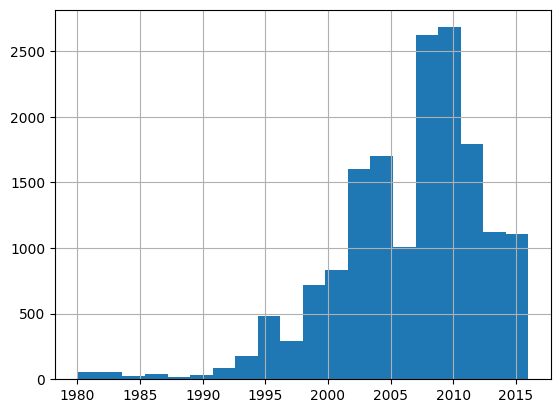

In [12]:
critic_mean = data['year_of_release'].mean()
critic_median = data['year_of_release'].median()

print("Descriptive Statistic of Column 'year_of_release':")

print(data['year_of_release'].describe())

data['year_of_release'].hist(bins=20)

print(f"Average 'year_of_release': {critic_mean}")
print(f"Median 'year_of_release': {critic_median}")

The data distribution indicates that the median (2007) is nearly the same as the mean (2006.49), with the minimum release year value in 1980 and the maximum in 2016. The data distribution tends to be fairly uniform (not heavily skewed to one side) with minor skewness. Therefore, filling in missing values could be done using the mean value.

In [13]:
year_mean = int(data['year_of_release'].mean())
data['year_of_release'] = data['year_of_release'].fillna(year_mean)

#### 2.3.3. Column `critic_score`

Descriptive Statistic of Column 'critic_score':
count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64
Average 'critic_score': 68.96767850559173
Median 'critic_score': 71.0


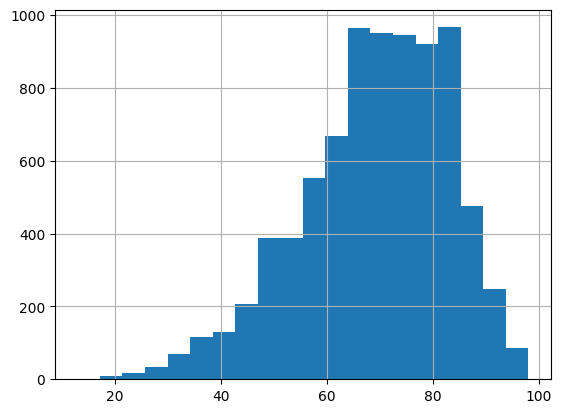

In [14]:
critic_mean = data['critic_score'].mean()
critic_median = data['critic_score'].median()

print("Descriptive Statistic of Column 'critic_score':")
print(data['critic_score'].describe())

data['critic_score'].hist(bins=20)

print(f"Average 'critic_score': {critic_mean}")
print(f"Median 'critic_score': {critic_median}")

The data distribution reveals a disparity between the median (71) and the mean (68.97). The data distribution is nearly symmetrical with a slight left-skew as the median is higher than the mean. Therefore, to fill in missing values, using the median could maintain the distribution without causing significant disturbance, even though the distribution is not highly pronounced.

In [15]:
critic_median = data['critic_score'].median()
data['critic_score'].fillna(critic_median, inplace=True)

#### 2.3.4. Column `user_score`

Descriptive Statistic of Column 'user_score':
count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64
Average 'user_score': 7.125046113306983
Median 'user_score': 7.5


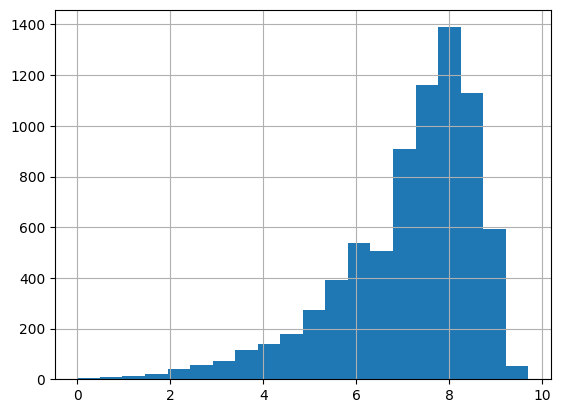

In [16]:
critic_mean = data['user_score'].mean()
critic_median = data['user_score'].median()

print("Descriptive Statistic of Column 'user_score':")
print(data['user_score'].describe())

data['user_score'].hist(bins=20)

print(f"Average 'user_score': {critic_mean}")
print(f"Median 'user_score': {critic_median}")

The data distribution indicates a difference between the median (7.5) and the mean (7.13). The data distribution is almost symmetrical but has a right-skewed shape as the median is lower than the mean. Hence, for filling in missing values, using the median could maintain the distribution without causing interference.

In [17]:
user_median = data['user_score'].median()
data['user_score'].fillna(user_median, inplace=True)

#### 2.3.5. Column `rating`

In [18]:
rating_mode = data['rating'].mode()[0]
data['rating'].fillna(rating_mode, inplace=True)

#### 2.3.6. Recheck Missing Value Existence

In [19]:
data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

### 2.4. Data Transformation & Manipulation

In [20]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [21]:
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
9762,Legend of the Guardians: The Owls of Ga'Hoole,DS,2010,Action,0.11,0.01,0.00,0.01,33.0,7.5,E10+,0.13
15601,Triggerheart Excelica Enhanced,PS2,2009,Shooter,0.00,0.00,0.02,0.00,71.0,7.5,E,0.02
5912,Finding Nemo: The Continuing Adventures,GBA,2004,Action,0.21,0.08,0.00,0.01,71.0,7.5,E,0.30
13832,Samurai Warriors 2: Empires,X360,2007,Action,0.03,0.00,0.01,0.00,53.0,8.5,T,0.04
9594,DT Racer,PS2,2005,Racing,0.06,0.05,0.00,0.02,71.0,3.8,E,0.13


## 3. Data Analysis Exploration

### 3.1. Total Games released on different Year

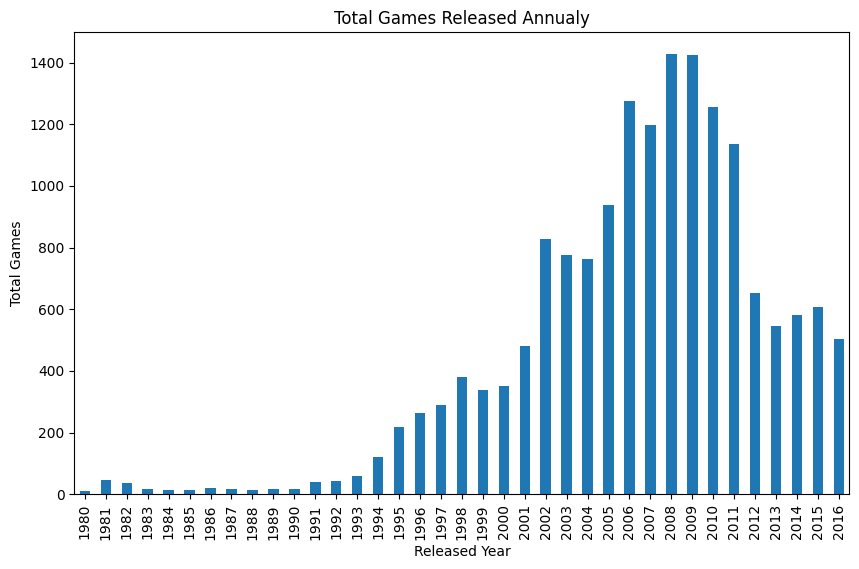

In [22]:
game_count_per_year = data.groupby('year_of_release')['name'].count()

game_count_per_year.plot(kind='bar', figsize=(10, 6))
plt.title('Total Games Released Annualy')
plt.xlabel('Released Year')
plt.ylabel('Total Games')
plt.show()

In [23]:
print("Total Games Released Annualy:")
print(game_count_per_year)

Total Games Released Annualy:
year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1275
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


From the graph showing the number of games released per year, there is a significant surge observed from the mid-1990s until its peak around 2008 to 2009, followed by a gradual decline up to 2016. The most notable decrease occurred in 2012. This might indicate a shift in the gaming industry, whether it's a focus on specific types of games or changes in consumer behavior.

### 3.2. Top 3 Platform with biggest sales

#### 3.2.1. Top 3 Platform Sales Distribution

In [24]:
top_3_platforms = data.groupby('platform')['total_sales'].sum().nlargest(3)
print("3 Platform with the biggest sales:")
print(top_3_platforms)

platforms = top_3_platforms.index.tolist()
for platform in platforms:
    platform_sales_distribution = data[data['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    print(f"Sales Distribution {platform} based on year:")
    print(platform_sales_distribution)

3 Platform with the biggest sales:
platform
PS2     1255.77
X360     971.42
PS3      939.65
Name: total_sales, dtype: float64
Sales Distribution PS2 based on year:
year_of_release
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    211.81
2005    160.66
2006    125.63
2007     75.99
2008     53.90
2009     26.40
2010      5.64
2011      0.45
Name: total_sales, dtype: float64
Sales Distribution X360 based on year:
year_of_release
2005      8.25
2006     61.80
2007     95.41
2008    135.26
2009    120.29
2010    170.03
2011    143.84
2012     99.74
2013     88.58
2014     34.74
2015     11.96
2016      1.52
Name: total_sales, dtype: float64
Sales Distribution PS3 based on year:
year_of_release
2006     29.27
2007     73.19
2008    118.52
2009    130.93
2010    142.17
2011    156.78
2012    107.36
2013    113.25
2014     47.76
2015     16.82
2016      3.60
Name: total_sales, dtype: float64


From the analysis of sales based on platforms, the three platforms with the largest total sales are PS2, X360, and PS3. There are significant differences in the sales distribution of these platforms from year to year. PS2 showed its sales peak in the early 2000s but experienced a significant decline after 2004. Meanwhile, X360, from its launch year in 2005, exhibited increasing sales until reaching its peak in 2010, then showing a tendency to decline. PS3 also displayed a sales increase after its launch in 2006, with its peak occurring between 2010 and 2011, followed by a decline.

#### 3.2.2 Obselete Platform

In [25]:
obsolete_platforms = data.groupby('platform')['year_of_release'].max()
obsolete_platforms = obsolete_platforms[obsolete_platforms < 2016]
print("Obselete platform:")
print(obsolete_platforms)

Obselete platform:
platform
2600    2006
3DO     1995
DC      2008
DS      2013
GB      2006
GBA     2007
GC      2007
GEN     1994
GG      1992
N64     2006
NES     1994
NG      1996
PCFX    1996
PS      2006
PS2     2011
PSP     2015
SAT     1999
SCD     1994
SNES    1999
TG16    1995
WS      2001
XB      2008
Name: year_of_release, dtype: Int64


From the obsolete platform analysis, it appears that several platforms became obsolete based on their last year of release before 2016. Platforms like 3DO, DC, GB, GBA, GC, N64, NES, PS, PS2, PSP, SNES, among others, became obsolete due to their last release year before 2016. This decline signifies the end of the lifecycle for each platform in the gaming industry.

### 3.3. Lifespan of unpopular and popular Platform

#### 3.3.1 List of the Platform became Unpopular with the Year

In [26]:
unpopular_platforms = data.groupby('platform')['year_of_release'].min()
unpopular_platforms = unpopular_platforms[unpopular_platforms < 2016]
print(unpopular_platforms)

platform
2600    1980
3DO     1994
3DS     2006
DC      1998
DS      1985
GB      1988
GBA     2000
GC      2001
GEN     1990
GG      1992
N64     1996
NES     1983
NG      1993
PC      1985
PCFX    1996
PS      1994
PS2     2000
PS3     2006
PS4     2013
PSP     2004
PSV     2006
SAT     1994
SCD     1993
SNES    1990
TG16    1995
WS      1999
Wii     2006
WiiU    2012
X360    2005
XB      2000
XOne    2013
Name: year_of_release, dtype: Int64


From the analysis of platforms that became unpopular, it is evident that several platforms made their debut with earlier release years before 2016. Platforms like 2600, 3DO, DS, GB, GG, NES, PC, PS, PS2, and others are examples of platforms that started to lose popularity over time before 2016. The decline in interest in these platforms indicates shifts in consumer preferences and the relatively short lifecycle of some platforms within the gaming industry. Some older platforms like 2600, NES, and GB signify that the gaming industry has seen significant evolution since these platforms entered the market.

#### 3.3.2. All Platform Lifespan 

In [27]:
platform_lifetimes = data.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifetimes['lifespan'] = platform_lifetimes['max'] - platform_lifetimes['min']
print(platform_lifetimes)

           min   max  lifespan
platform                      
2600      1980  2006        26
3DO       1994  1995         1
3DS       2006  2016        10
DC        1998  2008        10
DS        1985  2013        28
GB        1988  2006        18
GBA       2000  2007         7
GC        2001  2007         6
GEN       1990  1994         4
GG        1992  1992         0
N64       1996  2006        10
NES       1983  1994        11
NG        1993  1996         3
PC        1985  2016        31
PCFX      1996  1996         0
PS        1994  2006        12
PS2       2000  2011        11
PS3       2006  2016        10
PS4       2013  2016         3
PSP       2004  2015        11
PSV       2006  2016        10
SAT       1994  1999         5
SCD       1993  1994         1
SNES      1990  1999         9
TG16      1995  1995         0
WS        1999  2001         2
Wii       2006  2016        10
WiiU      2012  2016         4
X360      2005  2016        11
XB        2000  2008         8
XOne    

From the analysis of the duration of platforms in the gaming industry, it's evident that there is a wide range of lifespans among different platforms. Platforms like 2600, DS, PC, and others show relatively long lifespans, with some platforms lasting for more than 20 years, while others like GG, TG16, and PCFX have shorter lifespans.

### 3.4. Top 10 Platform with Biggest Sales

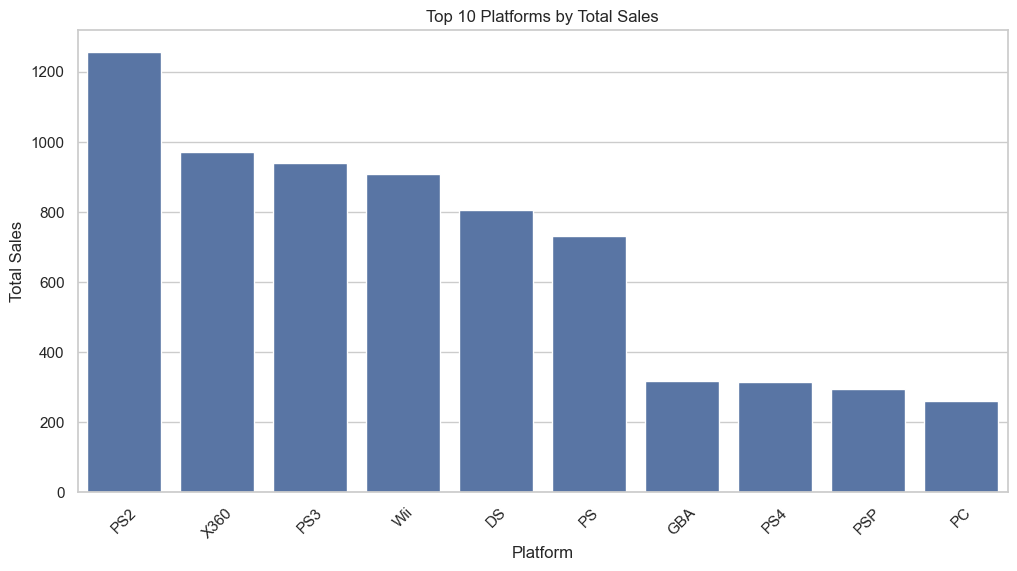

In [28]:
top_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=top_platforms.index, y=top_platforms.values)
plt.xlabel("Platform")
plt.ylabel("Total Sales")
plt.title("Top 10 Platforms by Total Sales")
plt.xticks(rotation=45)
plt.show()

In [29]:
print(top_platforms)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


From the analysis of platform sales, a bar chart illustrates the top ten platforms with the highest total sales. Platforms PS2, X360, and PS3 are at the forefront with the highest total sales, followed by Wii, DS, PS, GBA, PS4, PSP, and PC. PS2 stands out with the largest total sales, indicating its success in achieving significant sales. Both X360 and PS3 also exhibit strong sales performance, holding key positions in terms of total game sales. Meanwhile, Wii, DS, and PS also demonstrate substantial contributions to the total sales, reinforcing the popularity of these platforms in the gaming industry.

### 3.5. Global Sales of All Games Categorized by Platform

In [30]:
platform_sales_stats = data.groupby('platform')['total_sales'].describe()
print(platform_sales_stats)

           count      mean       std   min     25%    50%     75%    max
platform                                                                
2600       133.0  0.729173  0.917799  0.07  0.3000  0.460  0.7800   7.81
3DO          3.0  0.033333  0.023094  0.02  0.0200  0.020  0.0400   0.06
3DS        520.0  0.498077  1.430876  0.01  0.0500  0.120  0.3300  14.60
DC          52.0  0.306731  0.468660  0.02  0.0775  0.135  0.2975   2.41
DS        2151.0  0.374765  1.426451  0.01  0.0500  0.110  0.2700  29.80
GB          98.0  2.606735  5.365478  0.06  0.3025  1.165  2.1650  31.38
GBA        822.0  0.386679  0.896897  0.01  0.0525  0.160  0.3900  15.84
GC         556.0  0.357788  0.686346  0.01  0.0600  0.150  0.3525   7.06
GEN         27.0  1.050000  1.490041  0.03  0.0700  0.150  1.7050   6.02
GG           1.0  0.040000       NaN  0.04  0.0400  0.040  0.0400   0.04
N64        319.0  0.685517  1.316733  0.01  0.1350  0.270  0.5950  11.90
NES         98.0  2.561735  5.108012  0.06  1.0000 

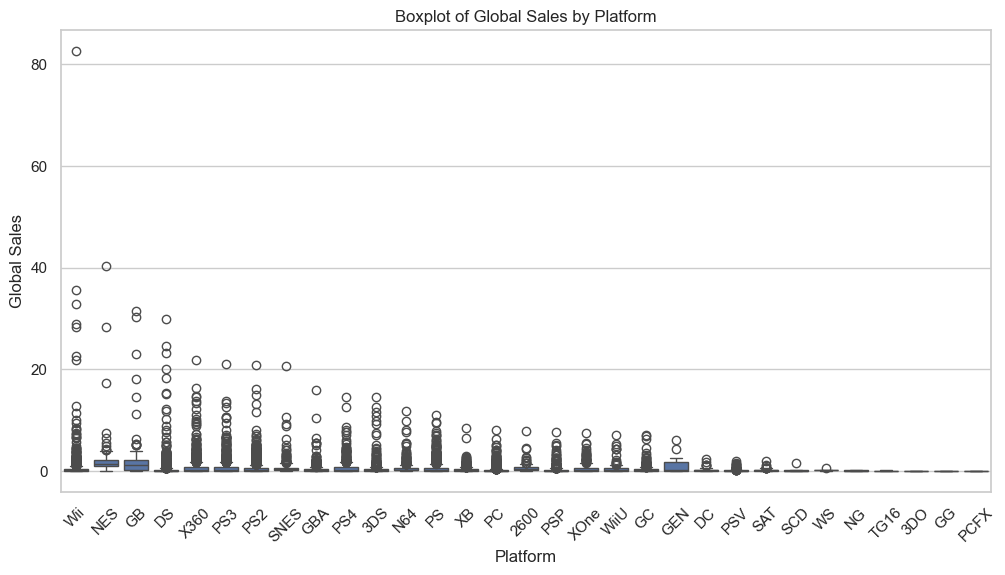

In [31]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=data)
plt.xlabel("Platform")
plt.ylabel("Global Sales")
plt.title("Boxplot of Global Sales by Platform")
plt.xticks(rotation=45)
plt.show()

From the analysis of global game sales by platform, the data is presented in the form of a box plot illustrating the distribution of game sales across different platforms. There is a significant variation in sales among these different platforms. For instance, platforms such as GB and NES stand out with relatively high average sales, indicating a strong popularity during the eras of these platforms. Meanwhile, modern platforms like PS4, X360, and PS3 also demonstrate good sales performance with competitive average sales. On the other hand, platforms like 3DO, PCFX, and GG show much lower sales, suggesting a lack of popularity or shorter lifespans. Some platforms exhibit high standard deviations in their sales, indicating a wide diversity in game sales performance across each platform.

### 3.6. Correlation between `user_score` and `critic_score` Affect the Top Platform

In [32]:
popular_platform = data.groupby('platform')['total_sales'].sum().idxmax()

print(popular_platform)

PS2


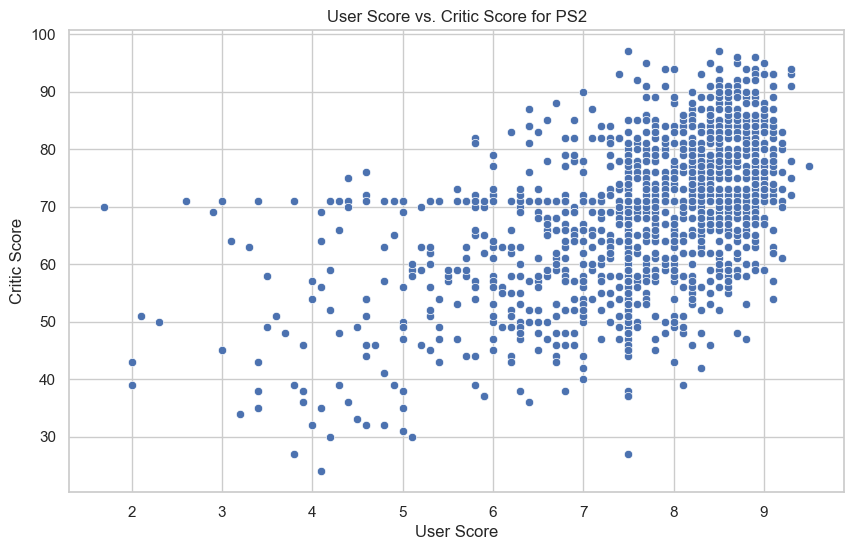

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='user_score', y='critic_score', data=data[data['platform'] == popular_platform])
plt.xlabel("User Score")
plt.ylabel("Critic Score")
plt.title(f"User Score vs. Critic Score for {popular_platform}")
plt.show()

In [34]:
correlation = data[data['platform'] == popular_platform]['user_score'].corr(data[data['platform'] == popular_platform]['critic_score'])
print(f"Correlation between user score and critic score for {popular_platform}: {correlation}")

Correlation between user score and critic score for PS2: 0.5058857046787998


From the analysis of the correlation between user reviews (user_score) and critic reviews (critic_score) on the PS2 platform, there appears to be a positive correlation of 0.505. This indicates a fairly strong relationship between the ratings provided by users and critics on the PS2 platform. While not a perfect correlation, this figure suggests that when a game receives high ratings from critics, it tends to also receive high ratings from users, and vice versa.

### 3.7. Top 5 Sales of Games with Many Platform Distribution

name
Need for Speed: Most Wanted    10
FIFA 14                         9
LEGO Marvel Super Heroes        9
Madden NFL 07                   9
Ratatouille                     9
Name: platform, dtype: int64


<Figure size 1000x600 with 0 Axes>

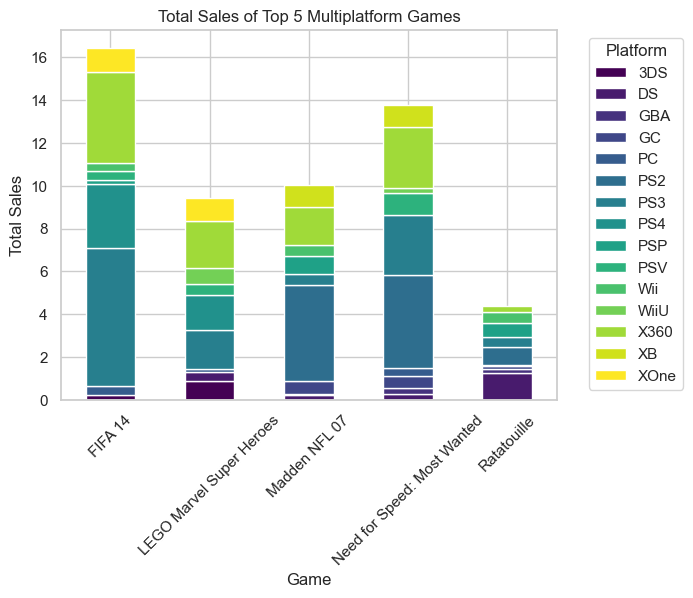

In [35]:
platform_count_per_game = data.groupby('name')['platform'].nunique()

top_5_multiplatform_games = platform_count_per_game.nlargest(5)
print(top_5_multiplatform_games)

multiplatform_data = data[data['name'].isin(top_5_multiplatform_games.index)]

total_sales_multiplatform = multiplatform_data.groupby(['name', 'platform'])['total_sales'].sum().unstack()

plt.figure(figsize=(10, 6))
total_sales_multiplatform.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel('Game')
plt.ylabel('Total Sales')
plt.title('Total Sales of Top 5 Multiplatform Games')
plt.xticks(rotation=45)
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [36]:
print(total_sales_multiplatform)

platform                      3DS    DS   GBA    GC    PC   PS2   PS3   PS4  \
name                                                                          
FIFA 14                      0.23   NaN   NaN   NaN  0.40   NaN  6.46  3.01   
LEGO Marvel Super Heroes     0.89  0.38   NaN   NaN  0.17   NaN  1.83  1.62   
Madden NFL 07                 NaN  0.22  0.03  0.63   NaN  4.49  0.52   NaN   
Need for Speed: Most Wanted   NaN  0.27  0.26  0.56  0.37  4.37  2.81   NaN   
Ratatouille                   NaN  1.25  0.19  0.14  0.02  0.84  0.51   NaN   

platform                      PSP   PSV   Wii  WiiU  X360    XB  XOne  
name                                                                   
FIFA 14                      0.19  0.41  0.38   NaN  4.22   NaN  1.16  
LEGO Marvel Super Heroes      NaN  0.51   NaN  0.74  2.22   NaN  1.05  
Madden NFL 07                0.84   NaN  0.50   NaN  1.80  1.03   NaN  
Need for Speed: Most Wanted   NaN  1.01   NaN  0.27  2.81  1.04   NaN  
Ratatouille   

From the analysis of the total sales of the top five multiplatform games (FIFA 14, LEGO Marvel Super Heroes, Madden NFL 07, Need for Speed: Most Wanted, Ratatouille), it is evident that each game has a significant distribution of sales across various platforms. While some games, such as FIFA 14, received strong sales across a large number of platforms, there are also games, like LEGO Marvel Super Heroes, which exhibited strong sales across some major platforms but not as extensively as FIFA 14.

### 3.8. Distribution of Top Sales based on Game's Genre

In [37]:
genre_counts = data['genre'].value_counts()
print(genre_counts)

genre
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: count, dtype: int64


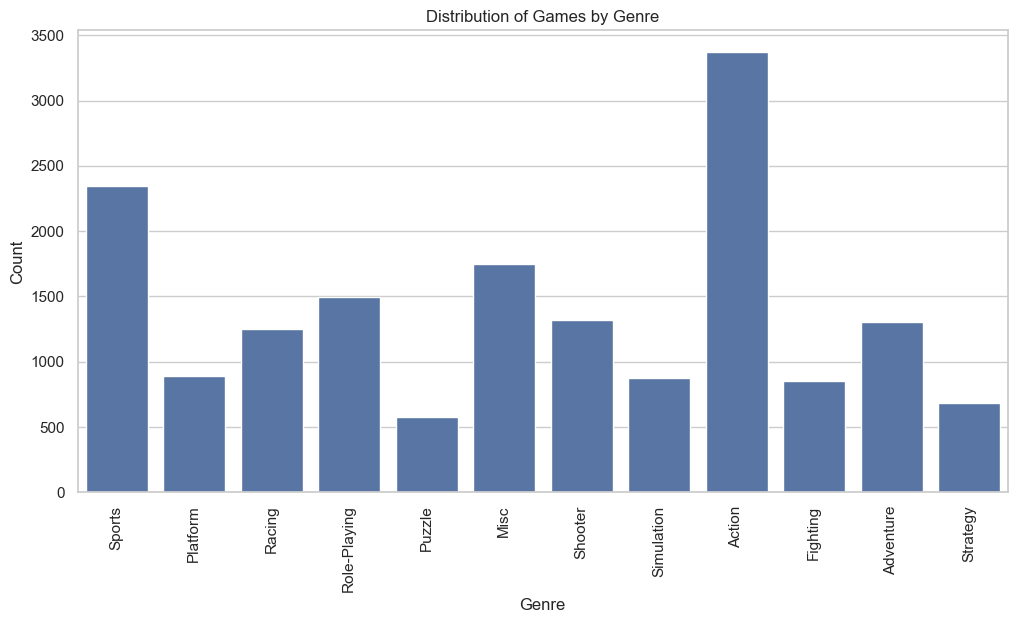

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x='genre', data=data)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Distribution of Games by Genre")
plt.xticks(rotation=90)
plt.show()

The distribution of games by genre demonstrates clear preferences within the gaming industry. Popular game genres primarily include Action, followed by Sports and Miscellaneous, indicating that games with action-packed themes, sports-related content, and a mix of various genres have a significant presence. Additionally, Role-Playing and Shooter genres also attract substantial attention. However, several other genres like Adventure, Racing, Platform, Simulation, Fighting, Strategy, and Puzzle have less presence, indicating comparatively lower interest in those genres within the gaming market.

### 3.9. User Profile based on Area 

#### 3.9.1. Area Sales Distribution for Top 1 Platform

<Axes: xlabel='year_of_release'>

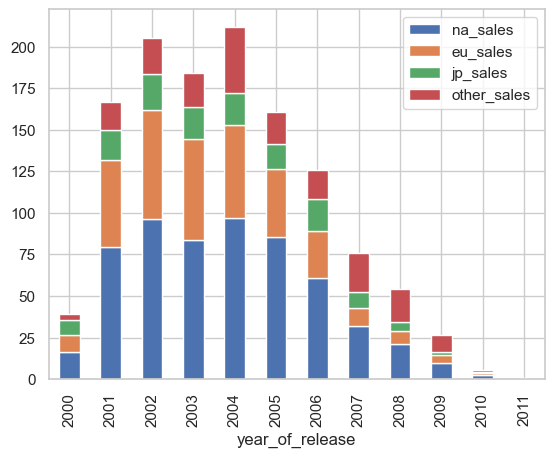

In [39]:
sales_per_platform = data.groupby(['year_of_release', 'platform'])[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index()

total_sales_per_platform = sales_per_platform.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum()
biggest_selling_platform = total_sales_per_platform.sum(axis=1).idxmax()

data_biggest_platform = sales_per_platform[sales_per_platform['platform'] == biggest_selling_platform]
data_biggest_platform.plot(x='year_of_release', y=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], kind='bar', stacked=True)


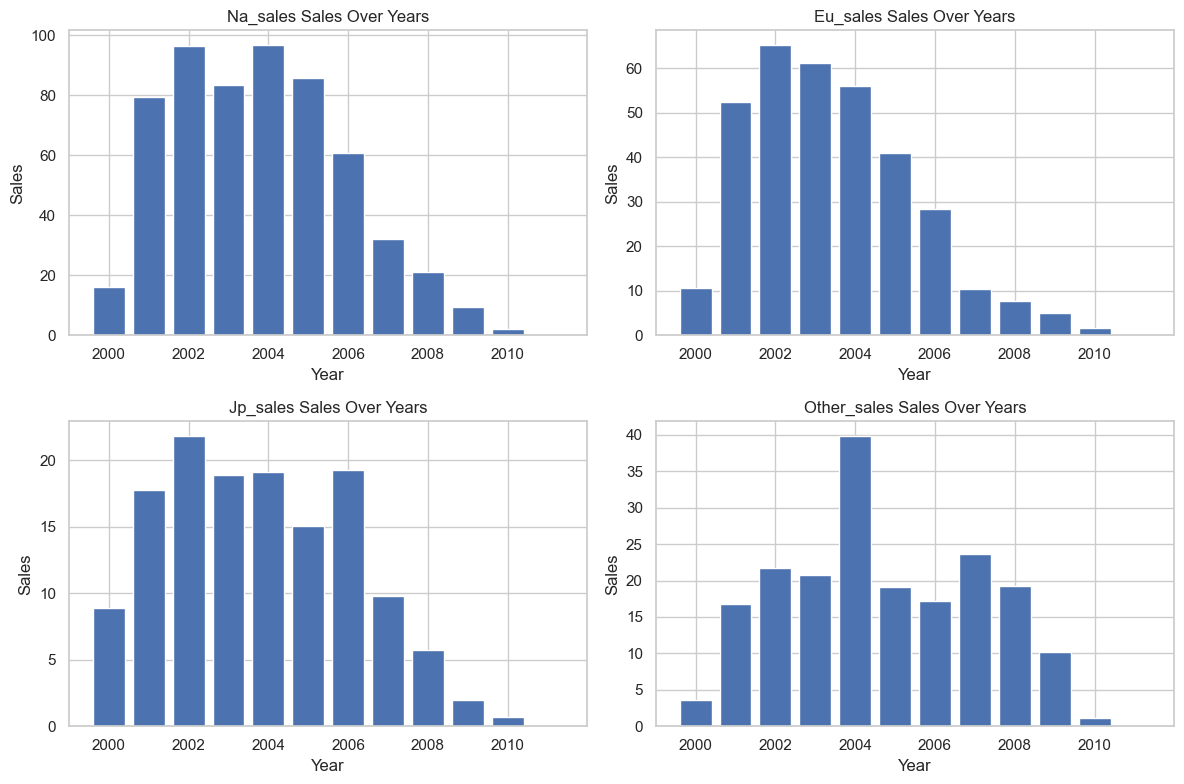

In [40]:
data_biggest_platform = sales_per_platform[sales_per_platform['platform'] == biggest_selling_platform]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sales_regions = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']

for i, ax in enumerate(axes.flatten()):
    region = sales_regions[i]
    ax.bar(data_biggest_platform['year_of_release'], data_biggest_platform[region])
    ax.set_title(f'{region.capitalize()} Sales Over Years')
    ax.set_xlabel('Year')
    ax.set_ylabel('Sales')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [41]:
print(data_biggest_platform)

     year_of_release platform  na_sales  eu_sales  jp_sales  other_sales
94              2000      PS2     16.08     10.64      8.87         3.58
104             2001      PS2     79.49     52.37     17.79        16.78
113             2002      PS2     96.54     65.27     21.85        21.72
119             2003      PS2     83.54     61.20     18.88        20.69
125             2004      PS2     96.78     56.01     19.17        39.85
132             2005      PS2     85.60     40.86     15.05        19.15
145             2006      PS2     60.85     28.27     19.30        17.21
157             2007      PS2     32.05     10.43      9.82        23.69
166             2008      PS2     21.23      7.63      5.73        19.31
174             2009      PS2      9.36      4.94      1.94        10.16
181             2010      PS2      2.19      1.54      0.71         1.20
189             2011      PS2      0.13      0.13      0.09         0.10


The sales distribution of the largest platform, PS2, demonstrates a clear trend over a specific range of years. PS2 peaked in total sales across regions in the early years, especially between 2000 and 2006, followed by a steady decline in sales in the subsequent years, with the lowest sales recorded in 2011. PS2's highest sales in North America (NA), Europe (EU), and other regions show a similar pattern, with peak sales noted in the early 2000s, followed by a gradual decline.

#### 3.9.2. Top 5 Platform in NA, EU, and JP

In [42]:
top_platforms_na = data.groupby('platform')['na_sales'].sum().nlargest(5)
top_platforms_eu = data.groupby('platform')['eu_sales'].sum().nlargest(5)
top_platforms_jp = data.groupby('platform')['jp_sales'].sum().nlargest(5)

In [43]:
print("Top 5 Platforms in North America (NA):")
print(top_platforms_na)

print("Top 5 Platforms in Europe (EU):")
print(top_platforms_eu)

print("Top 5 Platforms in Japan (JP):")
print(top_platforms_jp)

Top 5 Platforms in North America (NA):
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64
Top 5 Platforms in Europe (EU):
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64
Top 5 Platforms in Japan (JP):
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


The gaming market in North America (NA) is dominated by platforms like X360, PS2, Wii, PS3, and DS, with X360 being the top platform, recording the highest sales at 602.47 million dollars, followed by PS2 and Wii. In Europe (EU), the top platforms include PS2, PS3, X360, Wii, and PS. In Japan (JP), the highest sales occur on platforms like DS, PS, PS2, SNES, and 3DS, indicating a preference for different platforms compared to the North American and European markets.

#### 3.9.3. Top 5 Genre in NA, EU, and JP

In [44]:
top_genres_na = data.groupby('genre')['na_sales'].sum().nlargest(5)
top_genres_eu = data.groupby('genre')['eu_sales'].sum().nlargest(5)
top_genres_jp = data.groupby('genre')['jp_sales'].sum().nlargest(5)


In [45]:
print("Top 5 Genres in North America (NA):")
print(top_genres_na)

print("Top 5 Genres in Europe (EU):")
print(top_genres_eu)

print("Top 5 Genres in Japan (JP):")
print(top_genres_jp)

Top 5 Genres in North America (NA):
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64
Top 5 Genres in Europe (EU):
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64
Top 5 Genres in Japan (JP):
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


In North America, game genres like Action, Sports, Shooter, Platform, and Misc lead in sales. On the other hand, in Europe, Action, Sports, Shooter, Racing, and Misc dominate. In Japan, Role-Playing, Action, Sports, Platform, and Misc genres are more popular, showing different preferences compared to other markets, with Role-Playing being the top-selling genre.

#### 3.9.4. ESRB Rating Influence the Sales in each Area

In [46]:
ratings_influence_na = data.groupby('rating')['na_sales'].sum()
ratings_influence_eu = data.groupby('rating')['eu_sales'].sum()
ratings_influence_jp = data.groupby('rating')['jp_sales'].sum()

In [47]:
print("ESRB Ratings Influence on Sales in North America (NA):")
print(ratings_influence_na)

print("ESRB Ratings Influence on Sales in Europe (EU):")
print(ratings_influence_eu)

print("ESRB Ratings Influence on Sales in Japan (JP):")
print(ratings_influence_jp)

ESRB Ratings Influence on Sales in North America (NA):
rating
AO         1.26
E       2533.67
E10+     353.32
EC         1.53
K-A        2.56
M        748.48
RP         0.00
T        759.75
Name: na_sales, dtype: float64
ESRB Ratings Influence on Sales in Europe (EU):
rating
AO         0.61
E       1323.55
E10+     188.52
EC         0.11
K-A        0.27
M        483.97
RP         0.08
T        427.03
Name: eu_sales, dtype: float64
ESRB Ratings Influence on Sales in Japan (JP):
rating
AO         0.00
E       1040.04
E10+      40.20
EC         0.00
K-A        1.46
M         64.24
RP         0.00
T        151.40
Name: jp_sales, dtype: float64


ESRB ratings "E" (Everyone), "M" (Mature), and "T" (Teen) have the most significant influence on sales in North America. In Europe, E, M, and T ratings are also dominant in sales, although with lower figures compared to the North American market. In Japan, the "E" rating has the most significant influence, followed by the "T" rating, indicating different preferences from the other two markets with a greater emphasis on the "E" rating in Japan. The "AO" (Adults Only) rating has low sales in all regions.

## 4. Hypothesis Testing

### 4.1. Average User Rating between Xbox One and PC as the Platform

- H0 Null Hypothesis = There is no significance difference between average `user_score` rating for Xbox One and PC platform
- H1 Alternate Hypothesis = There is significance difference between average `user_score` rating for Xbox One and PC platform

alpha = 0.05

In [48]:
rating_xbox_one = data[data['platform'] == 'XOne']['user_score']
rating_pc = data[data['platform'] == 'PC']['user_score']

alpha = 0.05

In [49]:
t_stat, p_value = stats.ttest_ind(rating_xbox_one, rating_pc, equal_var=False)

print("Hyphothesis Testing Result between Platform Xbox One & PC:")

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Reject Null Hypothesis.")
   
else:
    print("Not enough evidance to reject the Null Hypothesis.")

Hyphothesis Testing Result between Platform Xbox One & PC:
t-statistic: -4.101285428616136
p-value: 4.964162612622159e-05
Reject Null Hypothesis.


### 4.2. Average User Rating between Action and Sports as the Genre

- H0 Null Hypothesis = There is no significance difference between average `user_score` rating for Action and Sport genre
- H1 Alternate Hypothesis = There is significance difference between average `user_score` rating for Action and Sport genre

alpha = 0.05

In [50]:
rating_action = data[data['genre'] == 'Action']['user_score']
rating_sports = data[data['genre'] == 'Sports']['user_score']

alpha = 0.05

In [51]:
t_stat, p_value = stats.ttest_ind(rating_action, rating_sports, equal_var=False)

print("Hyphothesis Testing Result between Action & Sports Genre:")

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

if p_value < alpha:
    print("Reject Null Hypothesis.")

else:
    print("Not enough evidance to reject the Null Hypothesis.")

Hyphothesis Testing Result between Action & Sports Genre:
t-statistic: 0.3639477704499268
p-value: 0.7159128316394157
Not enough evidance to reject the Null Hypothesis.


## 5. Overall Summary

After exploring the video game data from 2016 and conducting various analyses, we've drawn several crucial conclusions. First, from the data on the number of games released per year, a significant upward trend is evident from the mid-1990s to its peak around 2008 to 2009, followed by a gradual decline until 2016. However, the most substantial decline occurred in 2012, possibly indicating a change in the gaming industry or shifts in consumer behavior.

Moving on to platform analysis, we discovered the three platforms with the highest total sales: PS2, X360, and PS3. Each platform exhibited a unique trend: PS2 reached its sales peak in the early 2000s, X360 saw an increase until its peak in 2010 before experiencing a decline, and PS3 showed a similar pattern.

Furthermore, from the analysis of outdated and less popular platforms, it's evident that several platforms had become obsolete based on their last release year before 2016. The waning interest in these platforms suggests a change in consumer preferences and relatively short life cycles for some platforms within the gaming industry.

Lastly, the analysis of the top multi-platform game sales highlighted significant sales distribution across various platforms. While some games achieved strong sales across a wide array of platforms, others demonstrated robust sales on select main platforms but not as extensively as other games. From these diverse analyses, it's clear that gaming sales trends are influenced by numerous factors and variations in user preferences.